In [30]:
import pandas as pd

heart_disease = pd.read_csv(r"C:\Users\shaum\Downloads\heart (1).csv")
heart_disease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [31]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
heart_disease.count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

x = heart_disease.drop(columns=['HeartDisease'])
y = heart_disease['HeartDisease']

cat_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG","ExerciseAngina", "ST_Slope"]
num_cols =["Age","RestingBP","Cholesterol","MaxHR","Oldpeak",]

preproc1 = ColumnTransformer([
    ("numerical", StandardScaler(), num_cols),
    ("categorical", OneHotEncoder(handle_unknown='ignore'), cat_cols)
])
preproc1

ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                 ['Age', 'RestingBP', 'Cholesterol', 'MaxHR',
                                  'Oldpeak']),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Sex', 'ChestPainType', 'FastingBS',
                                  'RestingECG', 'ExerciseAngina',
                                  'ST_Slope'])])

In [33]:
import xgboost as xgb
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

pipe1 = Pipeline(steps=[
    ('preprocessing', preproc1),
    ('model', xgb.XGBClassifier(random_state=143))
])

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size = 0.75, shuffle = True,
    stratify= y
)
pipe1.fit(x_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'MaxHR',
                                                   'Oldpeak']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=143, ...))])

In [47]:
#define param_grid

from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__max_depth': range (2, 10, 1),
    'model__n_estimators': range(60, 220, 40),
    'model__learning_rate': [0.1, 0.01, 0.05]
}

#LS guidance
# https://stats.stackexchange.com/questions/577845/how-to-choose-a-parameter-grid-for-a-models-hyperparameter-tuning

# param_grid  = {
   # 'max_depth': range (2, 10, 1),
    #'n_estimators': range(60, 220, 40),
    #'learning_rate': [0.1, 0.01, 0.05]
#}

grid_cv = GridSearchCV(
    estimator = pipe1,
    param_grid = param_grid,
    scoring='accuracy',
    cv=5,
    refit = True
    )

grid_cv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'RestingBP',
                                                                          'Cholesterol',
                                                                          'MaxHR',
                                                                          'Oldpeak']),
                                                                        ('categorical',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Sex',
                                                                          'ChestPainType',
                                                                          'FastingBS',
                                                                          'RestingECG',
                                                                          'ExerciseAngina',
                                                                          'ST_Slope'])])),
                                       ('model',
                                        XGBClassifier(base_score=None,...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=143, ...))]),
             param_grid={'model__learning_rate': [0.1, 0.01, 0.05],
                         'model__max_depth': range(2, 10),
                         'model__n_estimators': range(60, 220, 40)},
             scoring='accuracy')

In [48]:
best_params = grid_cv.best_params_
best_estimator = grid_cv.best_estimator_

In [ ]:
# This is what I tried myself, if above works, can remove this:


#param_grid = {
  #  'model__n_estimators': [100, 200, 300],
   # 'model__learning_rate': [0.01, 0.1, 0.2],
   # 'model__max_depth': [3, 4, 5],
   # 'model__subsample': [0.8, 1.0],
   # 'model__colsample_bytree': [0.8, 1.0]
#}




#grid_cv = GridSearchCV(
 #   estimator = pipe1,
  #  param_grid = param_grid,
   # scoring='accuracy',
    #cv=5,
    #refit = True
    #)

#grid_cv.fit(x_train,y_train)

#best_params = grid_cv.best_params_
#best_estimator = grid_cv.best_estimator_


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix, mean_squared_error
import numpy as np

y_pred = best_estimator.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
ROC = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
Logloss = log_loss(y_test, y_pred)
root_mean = mean_squared_error(y_test, y_pred)                                    

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {F1}")
print(f"ROC-AUC: {ROC}")
print(f"Confusion Matrix: {conf_matrix}")
print(f"Log Loss:{Logloss}")
print(f"RMSE: {root_mean}")

Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 2, 'model__n_estimators': 180}
Accuracy: 0.8739130434782608
Precision: 0.8602941176470589
Recall: 0.9212598425196851
F1 Score: 0.8897338403041825
ROC-AUC: 0.8683969115511047
Confusion Matrix: [[ 84  19]
 [ 10 117]]
Log Loss:4.54463455775825
RMSE: 0.12608695652173912


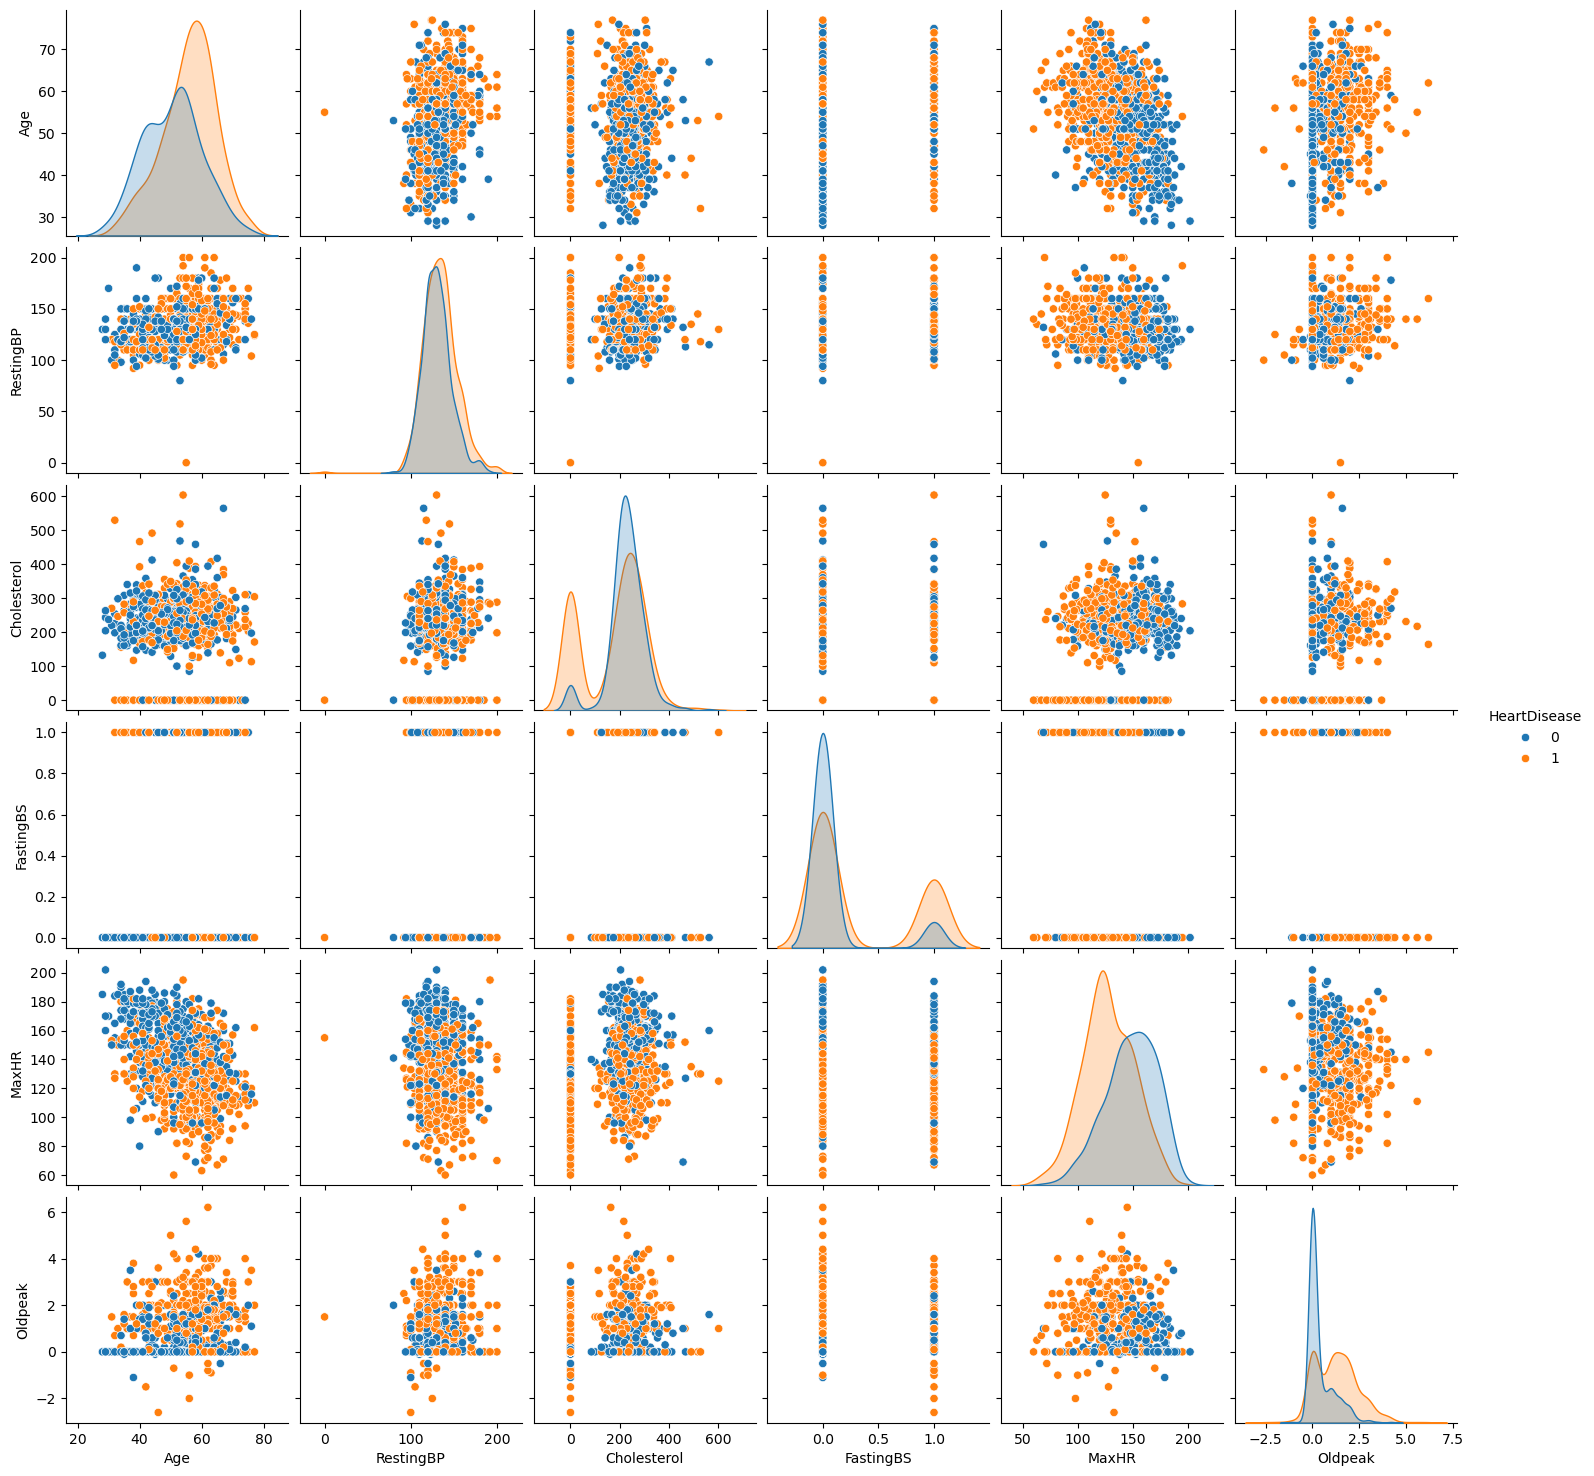

In [25]:
import seaborn as sns

sns.pairplot(data = heart_disease, hue = 'HeartDisease')